# Importando base de dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados/tips.csv')

In [5]:
dados.sample(5)

,total_bill,tip,dessert,day,time,size
210,30.06,2.0,Yes,Sat,Dinner,3
156,48.17,5.0,No,Sun,Dinner,6
141,34.30,6.7,No,Thur,Lunch,6
230,24.01,2.0,Yes,Sat,Dinner,4
212,48.33,9.0,No,Sat,Dinner,4


# Tradução

In [6]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [10]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'
}
gorjetas = dados.rename(columns = renomear)

In [11]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [12]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [18]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [20]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [21]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [24]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [25]:
dias = {'Sun' : 'Domingo', 'Sat' : 'Sábado', 'Thur' : 'Quinta', 'Fri' : 'Sexta'}

In [26]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [27]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [29]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [30]:
hora = {'Dinner' : 'Jantar', 'Lunch': 'Almoço'}
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [31]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importacão do Seaborn

In [33]:
!pip install seaborn

In [34]:
import seaborn as sns

In [35]:
!pip show seaborn

Name: seaborn
Version: 0.10.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: f:\anaconda3\lib\site-packages
Requires: pandas, scipy, numpy, matplotlib
Required-by: 


# Análise 1 - Valor da conta e gorjeta

In [38]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

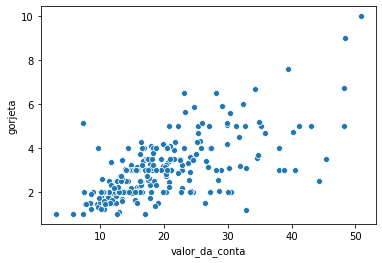

In [42]:
valor_gorjeta = sns.scatterplot(x= 'valor_da_conta', y = 'gorjeta', data = gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme o valor da conta**

In [48]:
print(f'A base de dados contem {gorjetas.shape[0]} registros')
print('Registros não nulos:')
gorjetas.count()

A base de dados contem 244 registros
Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criação o campo porcentagem

In [50]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [53]:
gorjetas['porcentagem'] = (gorjetas.gorjeta / gorjetas.valor_da_conta).round(2)

In [55]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


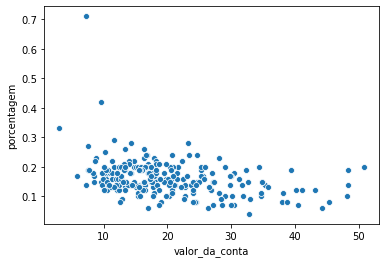

In [56]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

**Visualmente, o valor da conta nao é proporcional ao valor da gorjeta**

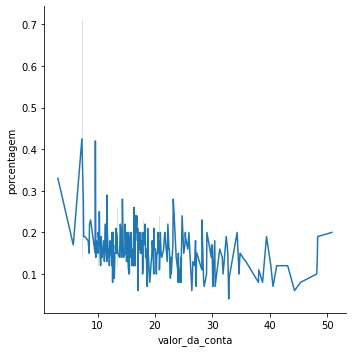

In [58]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind='line', data = gorjetas)

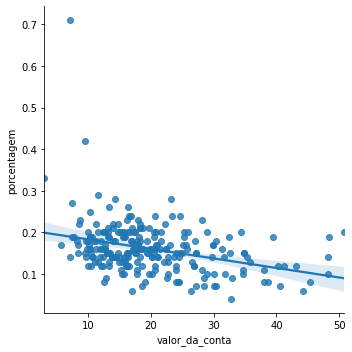

In [59]:
sns.lmplot(x='valor_da_conta', y = 'porcentagem', data=gorjetas)